In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

In [2]:
data = pd.read_csv('../Data/Courses.csv')
data

,Course,Edges To,Credits
0,ABC 101,ABC 103,3
1,ABC 102,ABC 104;ABC 105,4
2,ABC 103,ABC 105,4
3,ABC 104,ABC 106,3
4,ABC 105,NaN,2
5,ABC 106,NaN,4


In [3]:
courses = data["Course"].tolist()

credit_data = data["Credits"].tolist()
credit_dict = dict(zip(courses,credit_data))

edge_data = data["Edges To"].tolist()
edge_dict = {course: edges.split(';') if isinstance(edges, str) else [] for course, edges in zip(courses, edge_data)}

# Build Graph

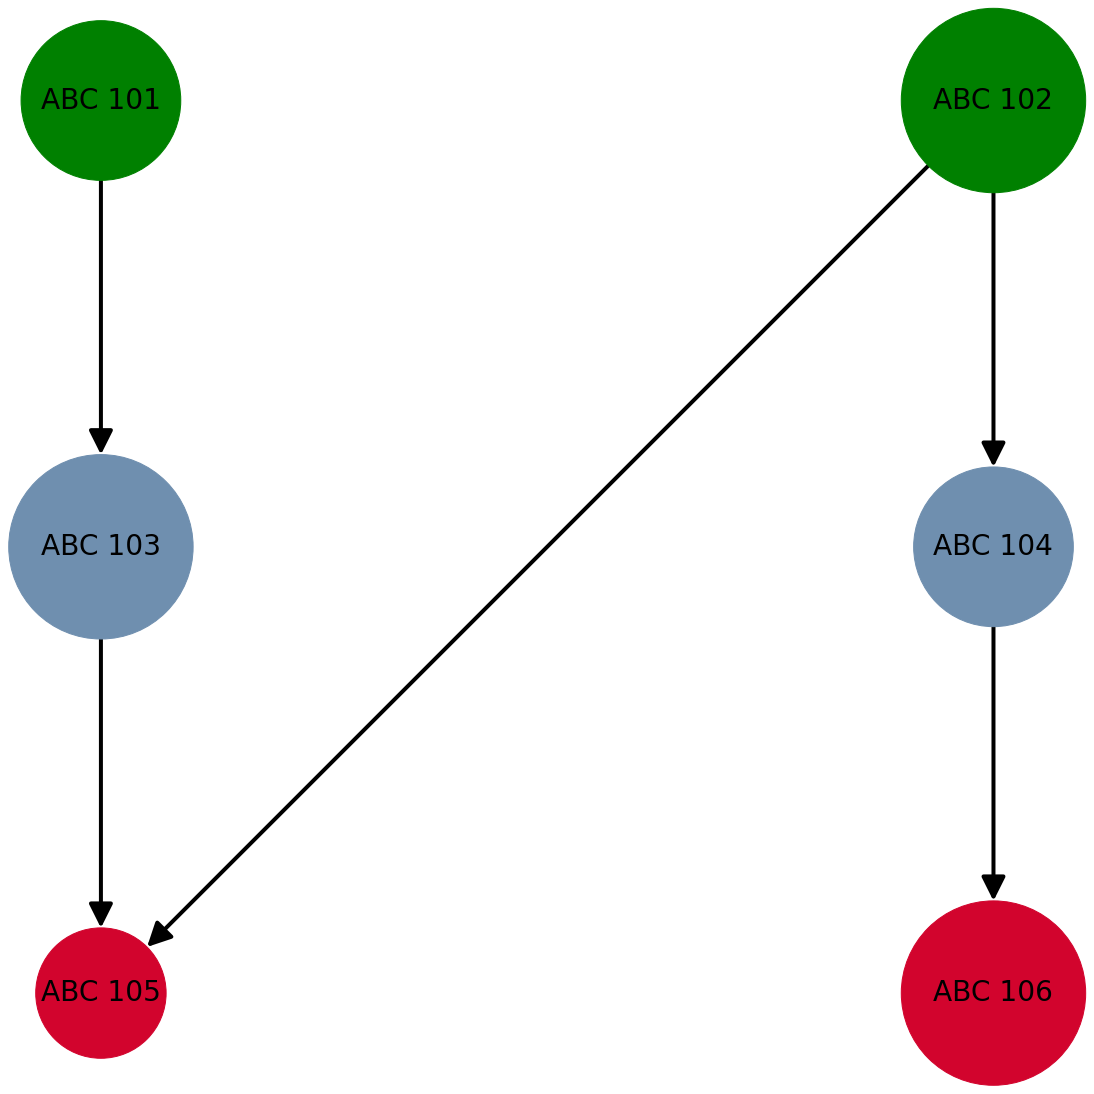

In [4]:
graph = nx.DiGraph()

for source, dests in edge_dict.items():
    graph.add_node(source)
    for dest in dests:
        graph.add_edge(source, dest)

pos = nx.nx_agraph.graphviz_layout(graph,prog='dot')

for course in ['ABC 102','ABC 104','ABC 106']:
    pos[course] = (pos[course][0]-50,pos[course][1]+72)

node_size = {}
label_pos = {}
node_color = {}
for node in graph.nodes:
    successors = list(graph.successors(node))
    predecessors = list(graph.predecessors(node))
    connections = len(successors) + len(predecessors)
    node_size[node] = credit_dict[node] * 5000
    label_pos[node] = (pos[node][0], pos[node][1])
    node_color[node] = '#6F8FAF'
    if len(successors) == 0:
        node_color[node] = '#D2042D'
    if len(predecessors) == 0:
        node_color[node] = '#008000'
    if connections == 0:
        node_color[node] = '#000000'
        
fig = plt.figure(figsize=(15,15))
nx.draw(graph, pos, with_labels=False, node_size=[1.7*v for v in node_size.values()], node_color=[v for v in node_color.values()],
        arrowsize=50, width=4)
labels = nx.draw_networkx_labels(graph, label_pos, font_size=28, font_family='sans-serif')
fig.savefig("../Curriculum Graphs/Curriculum A Courses.pdf",format="pdf")

# Make Graph Interactive

In [5]:
net = Network(directed = True, notebook=True, width="1920px", height="1080px")
net.from_nx(graph)
for node in net.get_nodes():
    net.get_node(node)['x'] = pos[node][0]
    net.get_node(node)['y'] = -pos[node][1] 
    net.get_node(node)['physics'] = False
    net.get_node(node)['label'] = str(node)
    successors = list(graph.successors(node))
    predecessors = list(graph.predecessors(node))
    connections = len(successors) + len(predecessors)
    net.get_node(node)['title'] = f"Connected Componets: {connections}\nPredecessors: {predecessors}\nSuccessors: {successors}"
    if len(successors) == 0:
        net.get_node(node)['color'] = 'red'
    if len(predecessors) == 0:
        net.get_node(node)['color'] = 'green'
    if connections == 0:
        net.get_node(node)['color'] = 'black'    
    net.get_node(node)['size'] = 4 * credit_dict[node]

net.toggle_physics(False)
net.show('../Curriculum Graphs/Curriculum A Courses.html')

../Curriculum Graphs/Curriculum A Courses.html
